# GEOSPATIAL ANALYSIS ON WORLD GREENHOUSE GASES EMISSION AND WORLD POPULATION


>Objective:
Analysis greenhouse emission of different countries of the world and how population effects the emission of greenhouse gases.

####** Install Useful Packages **

In [1]:
!pip install pipwin --quiet
!pipwin install gdal --quiet
!pipwin install fiona --quiet
!pip install geopandas --upgrade --quiet
!pip install mapclassify --quiet
!pip install pysal==2.0.0 --quiet
!pip install contextily --quiet

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Usage:
  pipwin install (<package> | [-r=<file> | --file=<file>]) [--proxy=<proxy>]
  pipwin uninstall <package>
  pipwin download (<package> | [-r=<file> | --file=<file>]) [-d=<dest> | --dest=<dest>] [--proxy=<proxy>]
  pipwin search <package> [--proxy=<proxy>]
  pipwin list
  pipwin refresh [--log=<log>] [--proxy=<proxy>]
  pipwin (-h | --help)
  pipwin (-v | --version)
Usage:
  pipwin install (<package> | [-r=<file> | --file=<file>]) [--proxy=<proxy>]
  pipwin uninstall <package>
  pipwin download (<package> | [-r=<file> | --file=<file>]) [-d=<dest> | --dest=<dest>] [--proxy=<proxy>]
  pipwin search <package> [--proxy=<proxy>]
  pipwin list
  pipwin refresh [--log=<log>] [--proxy=<proxy>]
  pipwin (-h | --help)
  pipwin (-v | --version)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.

In [2]:
# Import Useful Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import geopandas
import contextily
import matplotlib.pyplot as plt

DATA SOURCE: WORLD BANK
Read in the datasets to preview them, clean them and filter to only the data we require for this analysis.

In [3]:
# Read the data

greenhouse_data  = pd.read_csv("/content/API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_1865570.csv", skiprows=3)
greenhouse_data.head(3)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,18168.860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,41657.164846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Read the data

pop_data = pd.read_csv("/content/API_SP.POP.TOTL_DS2_en_csv_v2_4485025.csv", skiprows=3)
pop_data.head(3)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0,NaN


The greenhouse_data has a lot of missing entries for past years. However, instead of imputing them, we will focus on years we have interest in and subset the data.

The datasets also does not contain geometry data to use for plotting with geopandas. So I imported a new dataset containing all world countries and their geometry then merged the datasets.

## Merging the dataframes

Geopandas has a default dataset of world countries polygons. we will merge this dataset with greenhouse data

In [5]:
# Get world countries polygon

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

<ipython-input-5-523d1fd46e5b>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [7]:
# Merge dataset on matching columns (country code)

#geo_greenhouse = greenhouse_data.merge(world, left_on="Country Name", right_on="name", how="inner")

geo_greenhouse = greenhouse_data.merge(world, left_on="Country Code", right_on="iso_a3", how="inner")

print(f'The data contains {geo_greenhouse.shape[0]} rows and {geo_greenhouse.shape[1]} columns \n')

geo_greenhouse.tail(2)

The data contains 169 rows and 72 columns 



,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2018,2019,2020,Unnamed: 65,pop_est,continent,name,iso_a3,gdp_md_est,geometry
167,Zambia,ZMB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17861030.0,Africa,Zambia,ZMB,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."
168,Zimbabwe,ZWE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [8]:
# Print the geometry of the couuntries

geo_data = geopandas. GeoDataFrame(geo_greenhouse)
type(geo_data)
geo_data.geometry

0      POLYGON ((66.51861 37.36278, 67.07578 37.35614...
1      MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...
2      POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3      POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4      MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...
                             ...                        
164    MULTIPOLYGON (((167.21680 -15.89185, 167.84488...
165    POLYGON ((52.00001 19.00000, 52.78218 17.34974...
166    POLYGON ((16.34498 -28.57671, 16.82402 -28.082...
167    POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...
168    POLYGON ((31.19141 -22.25151, 30.65987 -22.151...
Name: geometry, Length: 169, dtype: geometry

I merged first using the country name column bearing in mind some names might be misspelt. This gave me 143 rows, however, using the code column, I have more countries properly merged.

# Question 1:
Plot a set of choropleth maps representing the world greenhouse gas emission for the years 2000 and 2010 respectively

In [9]:
#Add a new column suming all the greenhouse emission from 2000 to 2010, then fill countries without records with zero

geo_data['2000 - 2010 emissions'] = np.sum(geo_data[['2000', '2001', '2002', '2003', '2004',\
                                                                 '2005', '2006', '2007', '2008', '2009', '2010']], axis=1).fillna(0)

/usr/local/lib/python3.10/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 19 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


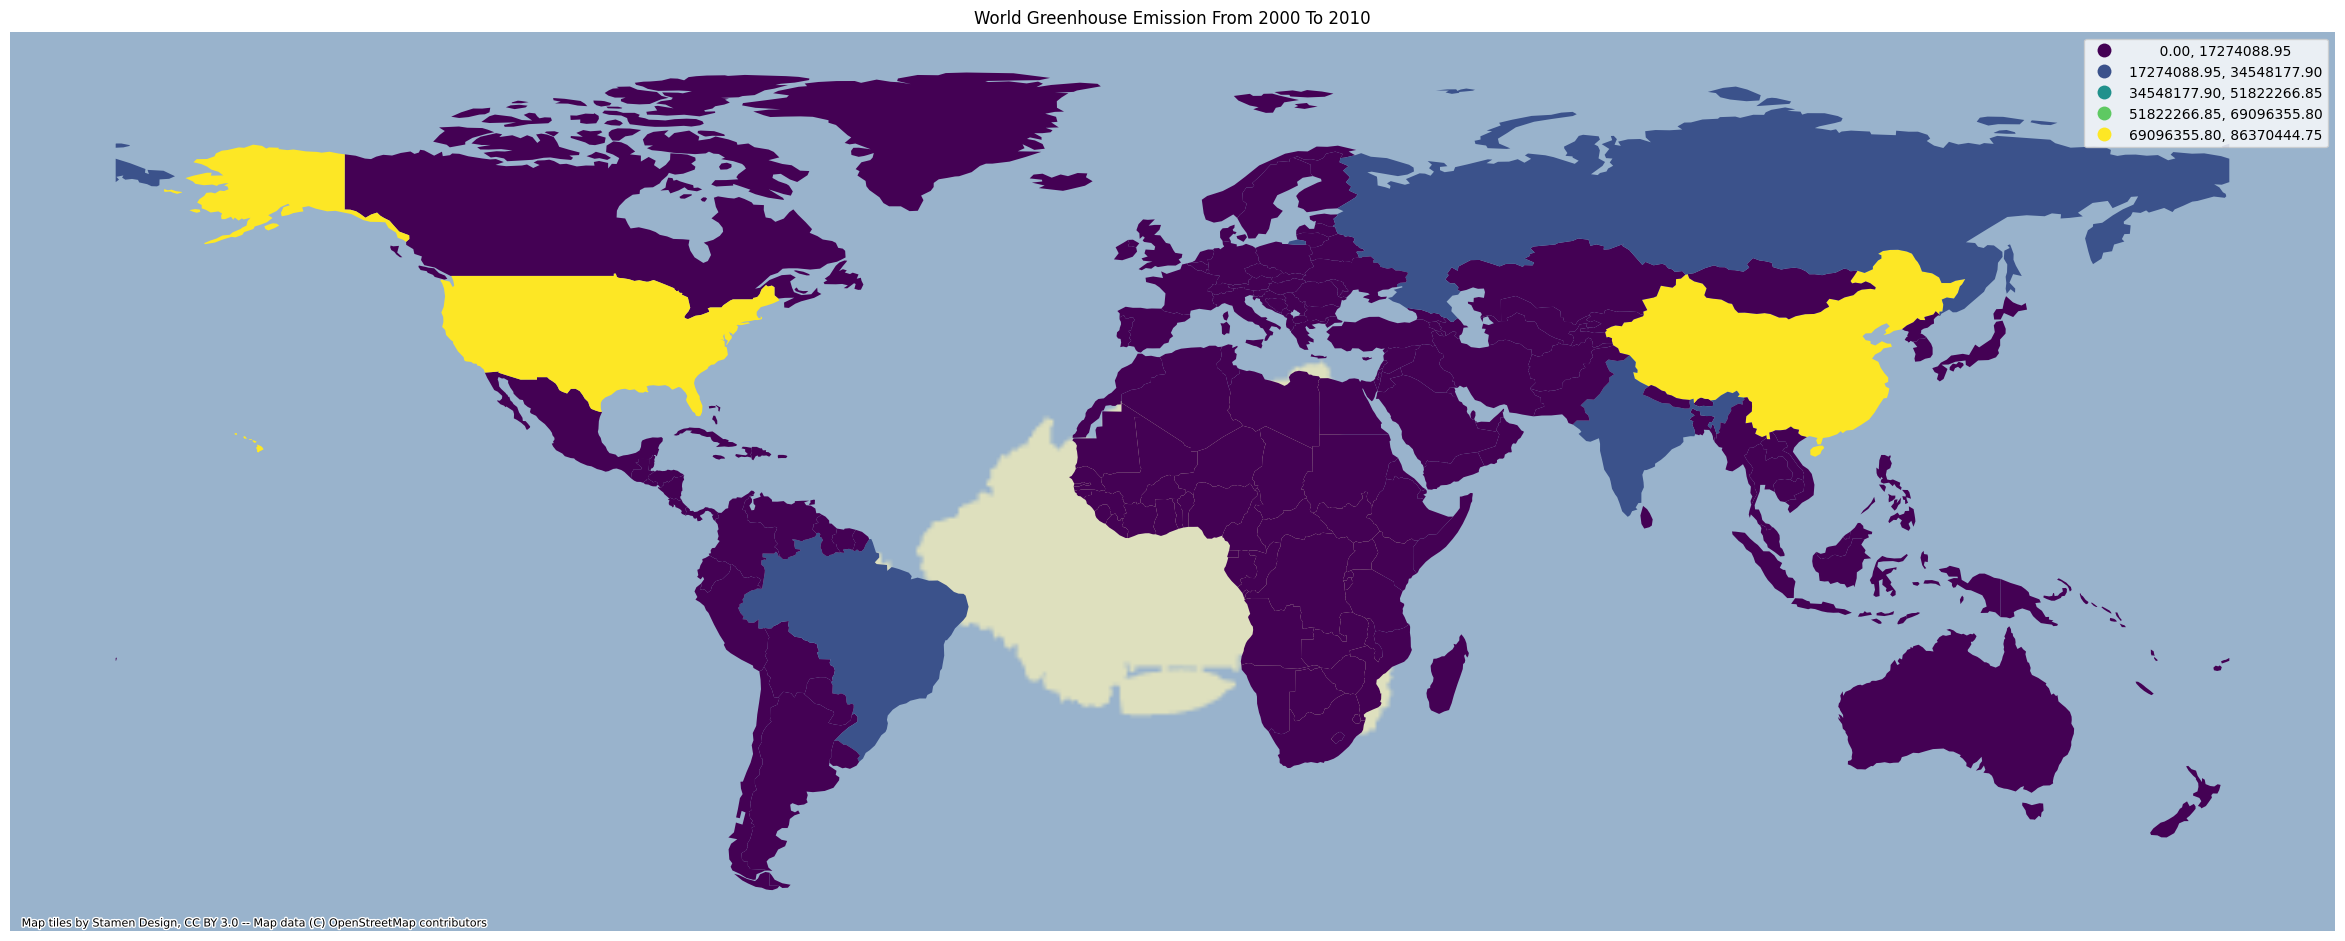

In [10]:
ax = geo_data.plot(column='2000 - 2010 emissions', figsize=(30,20), legend=True, scheme="equal_interval")
plt.title("World Greenhouse Emission From 2000 To 2010")
ax.set_axis_off()
contextily.add_basemap(ax)
plt.show()


It can be seen from the map that from 2000 to 2010, greenhouse emission was lowest in all African countries, Australia, South America and some European countries. Let us print the list of countries with highest emission following the map above.

In [11]:
# Print countries with highest emission from 2000 to 2010

geo_data[geo_data['2000 - 2010 emissions'] > 69096355][['Country Name', '2000 - 2010 emissions']].sort_values(by='2000 - 2010 emissions', ascending=False)

,Country Name,2000 - 2010 emissions
28,China,8.637044e+07
160,United States,7.627993e+07


#Question 2:
For the year 2005, generate choropleth maps of greenhouse gas emission for only the countries having populations less than 109856670. Very briefly interpret the generated map.

In [12]:
# Subset countries with less that 109856670 population in 2005

pop_data_2005 = pop_data[pop_data['2005'] < 109856670]

pop_data_2005_subset = pop_data_2005[['Country Name', 	'Country Code']]
pop_data_2005_subset.head(2)

,Country Name,Country Code
0,Aruba,ABW
2,Afghanistan,AFG


In [13]:
#Merge the new dataframe with the geodata and create a plot for only these countries

pop_data_2005_plot = geo_data.merge(pop_data_2005_subset, on="Country Name", how="inner")

geo_pop_data_2005 = geopandas.GeoDataFrame(pop_data_2005_plot)
type(geo_pop_data_2005)


geopandas.geodataframe.GeoDataFrame

In [14]:
#How many countries had a population of less than 109856670 in 2005?

print(f"{geo_pop_data_2005.shape[0]} countries had their population less than 109856670 in 2005")

157 countries had their population less than 109856670 in 2005


In [15]:
#Fill missing entries with 0

geo_pop_data_2005  = geo_pop_data_2005.fillna(0)

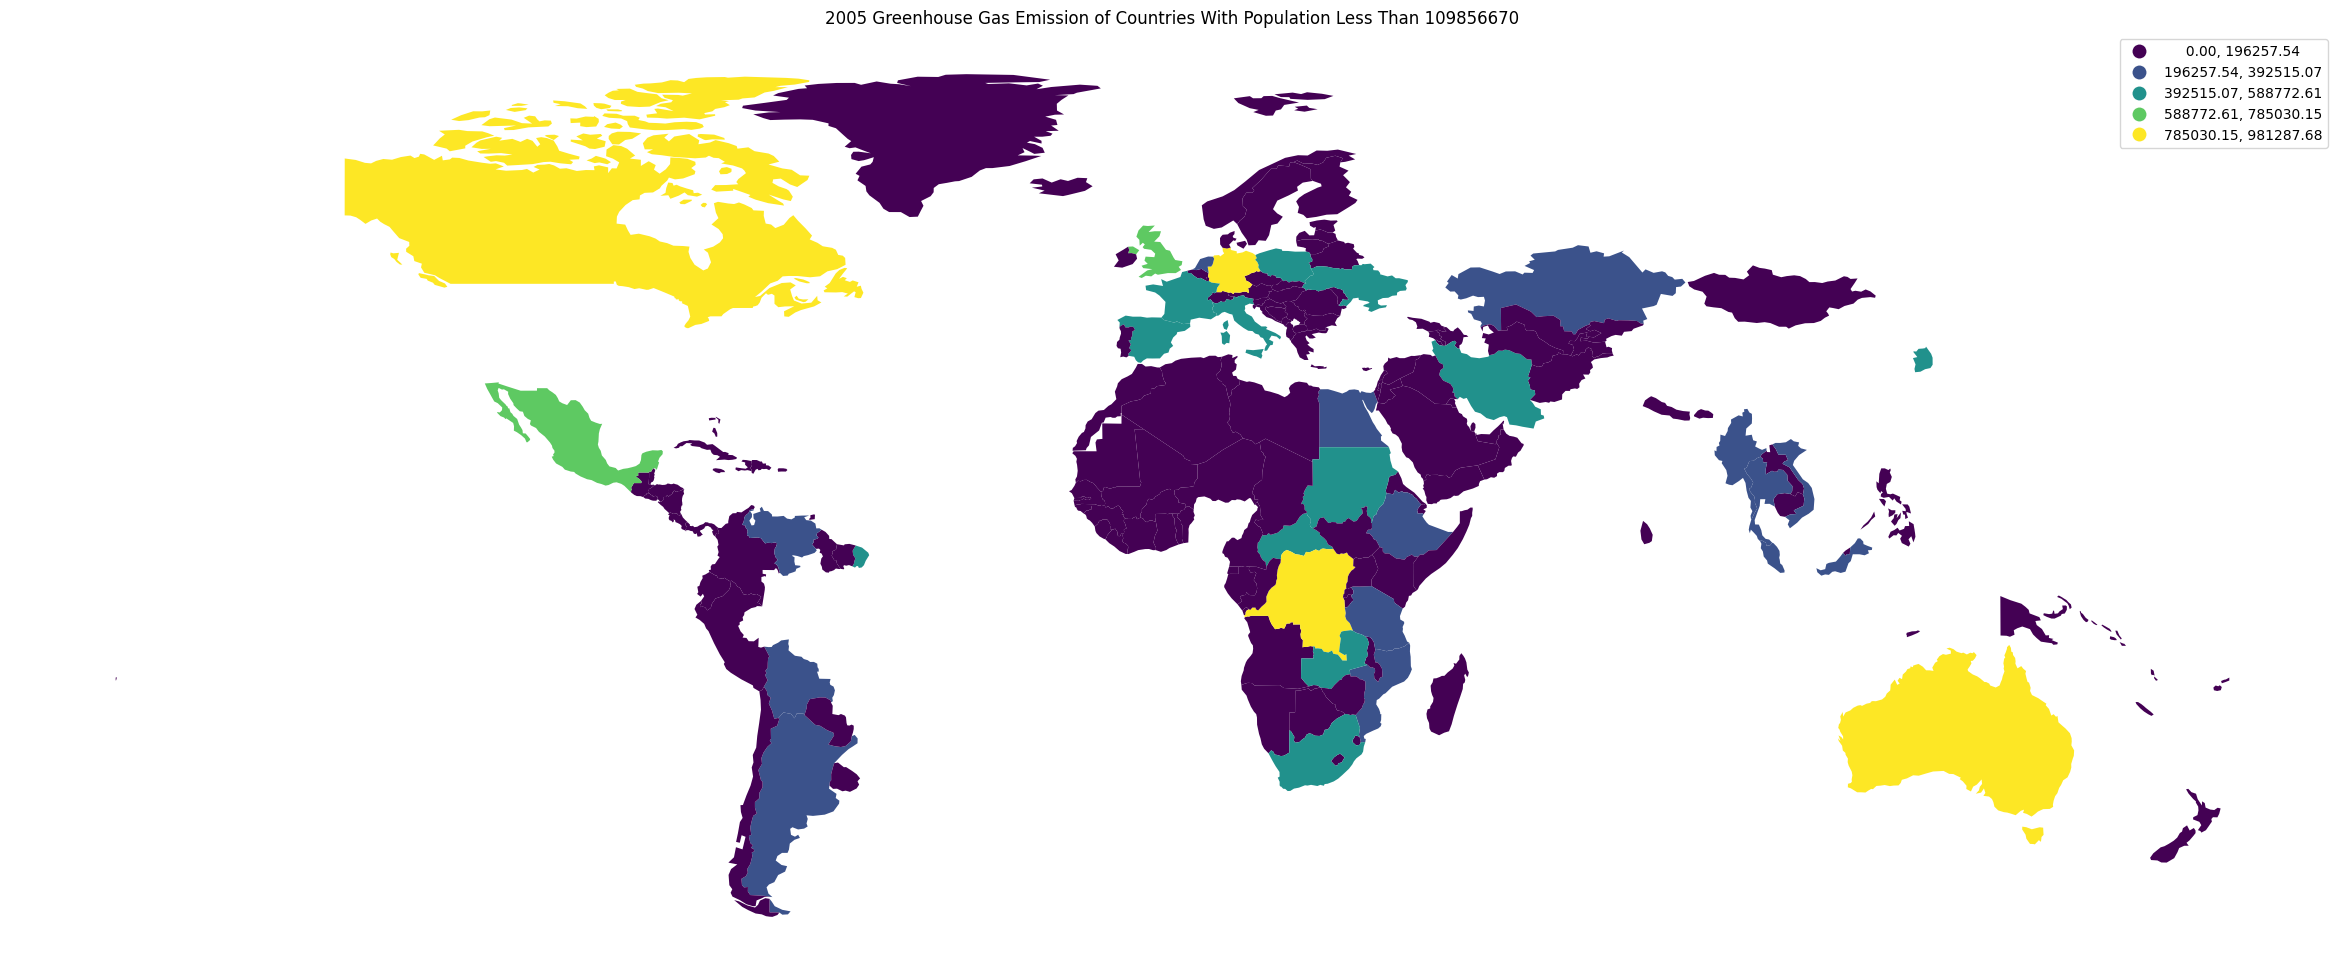

In [16]:
#Plot the greenhouse gas emission of countries with population less than 109856670


ax = geo_pop_data_2005.plot(column='2005', figsize=(30,20), legend=True, scheme="equal_interval")
plt.title("2005 Greenhouse Gas Emission of Countries With Population Less Than 109856670")
ax.set_axis_off()
plt.show()

The above map shows countries witth population less that 109856670 in 2005 and their greenhouse emission, let us get a list of the countries using the generated legend for countries with highest emissions.

In [17]:
# print names of countries with highest emission in 2005 and population < 109856670

geo_pop_data_2005[geo_pop_data_2005['2005'] > 785030][['Country Name', '2005']].sort_values(by='2005', ascending=False)

,Country Name,2005
35,Germany,981287.68434
6,Australia,909262.03000
23,Canada,849798.74000
28,"Congo, Dem. Rep.",794528.22000


#Question 3:
For the year 2005, create a map of greenhouse gas emission for only the countries having populations greater than 236200507

In [18]:
# Subset countries with population greater than 236200507 in 2005

pop_data_2005_2 = pop_data[pop_data['2005'] >  236200507]

pop_data_2005_subset_2 = pop_data_2005_2[['Country Name', 	'Country Code']]
pop_data_2005_subset_2.head(2)

,Country Name,Country Code
1,Africa Eastern and Southern,AFE
3,Africa Western and Central,AFW


In [19]:
#Merge the new dataframe with the geodata and create a plot for only these countries

pop_data_2005_plot_2 = geo_data.merge(pop_data_2005_subset_2, on="Country Name", how="inner")

geo_pop_data_2005_2 = geopandas.GeoDataFrame(pop_data_2005_plot_2)
type(geo_pop_data_2005_2)

geopandas.geodataframe.GeoDataFrame

3 Countries of The World had a population  Greater Than 236200507 in 2005


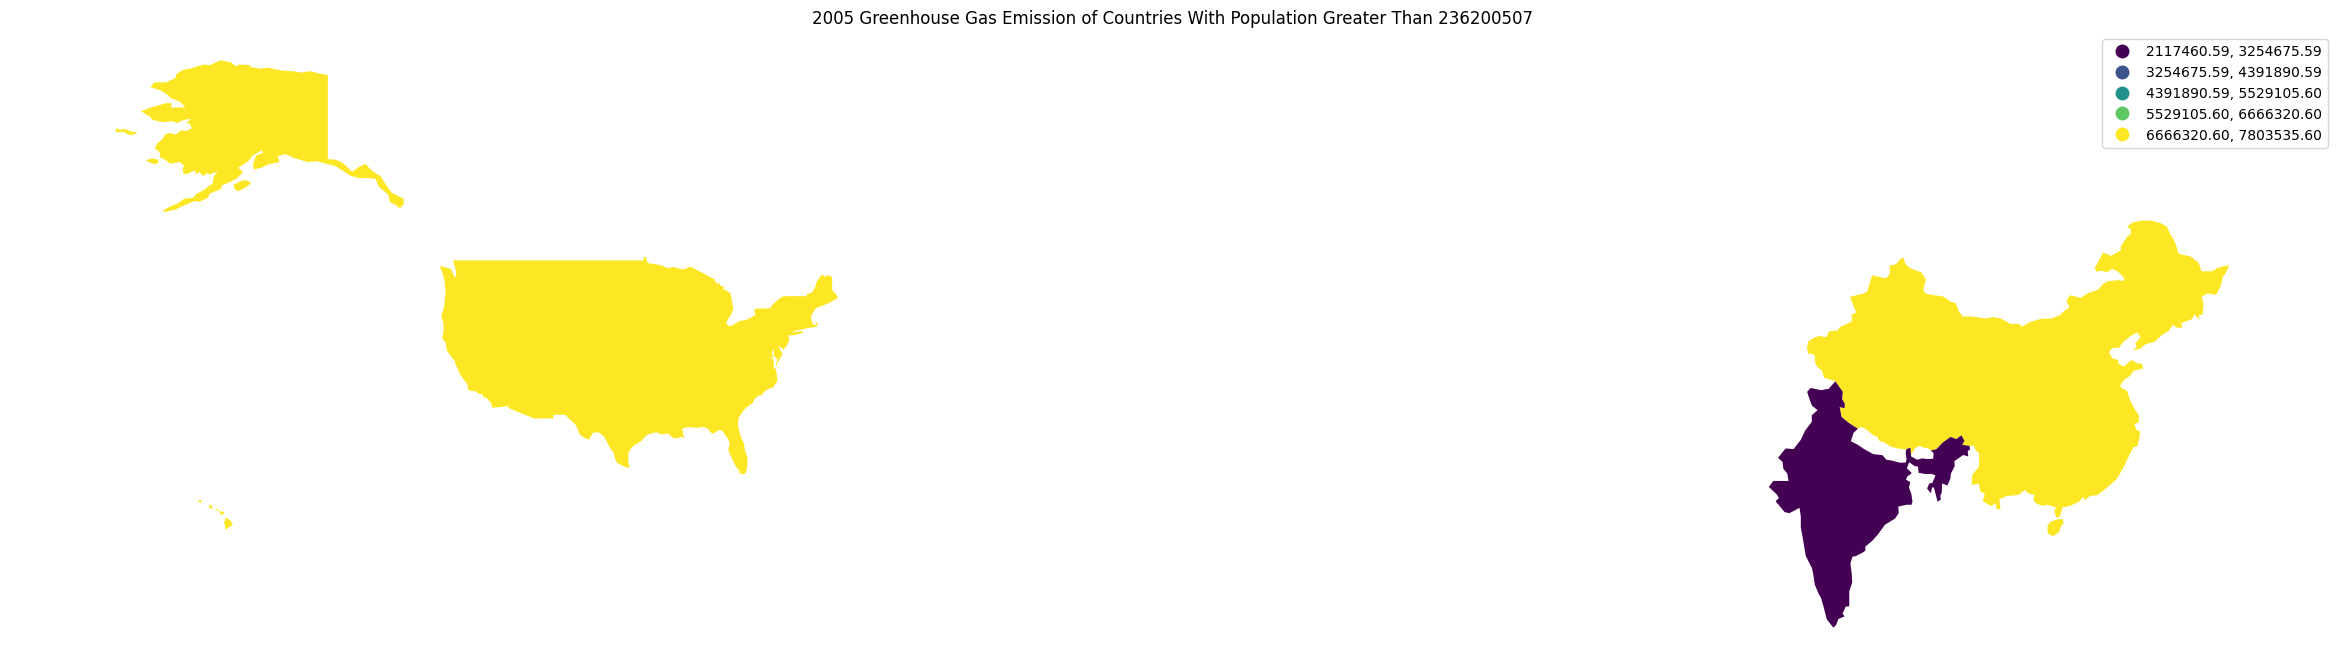

In [20]:
#Plot the greenhouse gas emission of countries with population greater than 236200507
geo_pop_data_2005_2 = geo_pop_data_2005_2.fillna(0)

print(f"{geo_pop_data_2005_2.shape[0]} Countries of The World had a population  Greater Than 236200507 in 2005")



ax = geo_pop_data_2005_2.plot(column='2005', figsize=(30,20), legend=True, scheme="equal_interval")
plt.title("2005 Greenhouse Gas Emission of Countries With Population Greater Than 236200507")
ax.set_axis_off()
plt.show()

In [21]:
# print names of countries with highest emission in 2005 and population > 236200507

geo_pop_data_2005_2[geo_pop_data_2005_2['2005'] > 6666320][['Country Name', '2005']].sort_values(by='2005', ascending=False)

,Country Name,2005
0,China,7803535.6
2,United States,7182808.4


#Question 4:
For the year 2005, generate choropleth maps of greenhouse gas emission for only the countries having a population between 842881 and 80890450

In [22]:
# Subset countries with population between 842881 and 80890450 in 2005

pop_data_2005_btw = pop_data[(pop_data['2005'] >  842881) & (pop_data['2005'] < 80890450 ) ]

pop_data_2005_subset_btw = pop_data_2005_btw[['Country Name', 	'Country Code']]



#Merge the new dataframe with the geodata and create a plot for only these countries

pop_data_2005_subset_btw_merged = geo_data.merge(pop_data_2005_subset_btw, on="Country Name", how="inner")

geo_pop_data_2005_subset = geopandas.GeoDataFrame(pop_data_2005_subset_btw_merged)
type(geo_pop_data_2005_subset)


geopandas.geodataframe.GeoDataFrame

137 Countries of The World had a population between 842881 and 80890450 in 2005


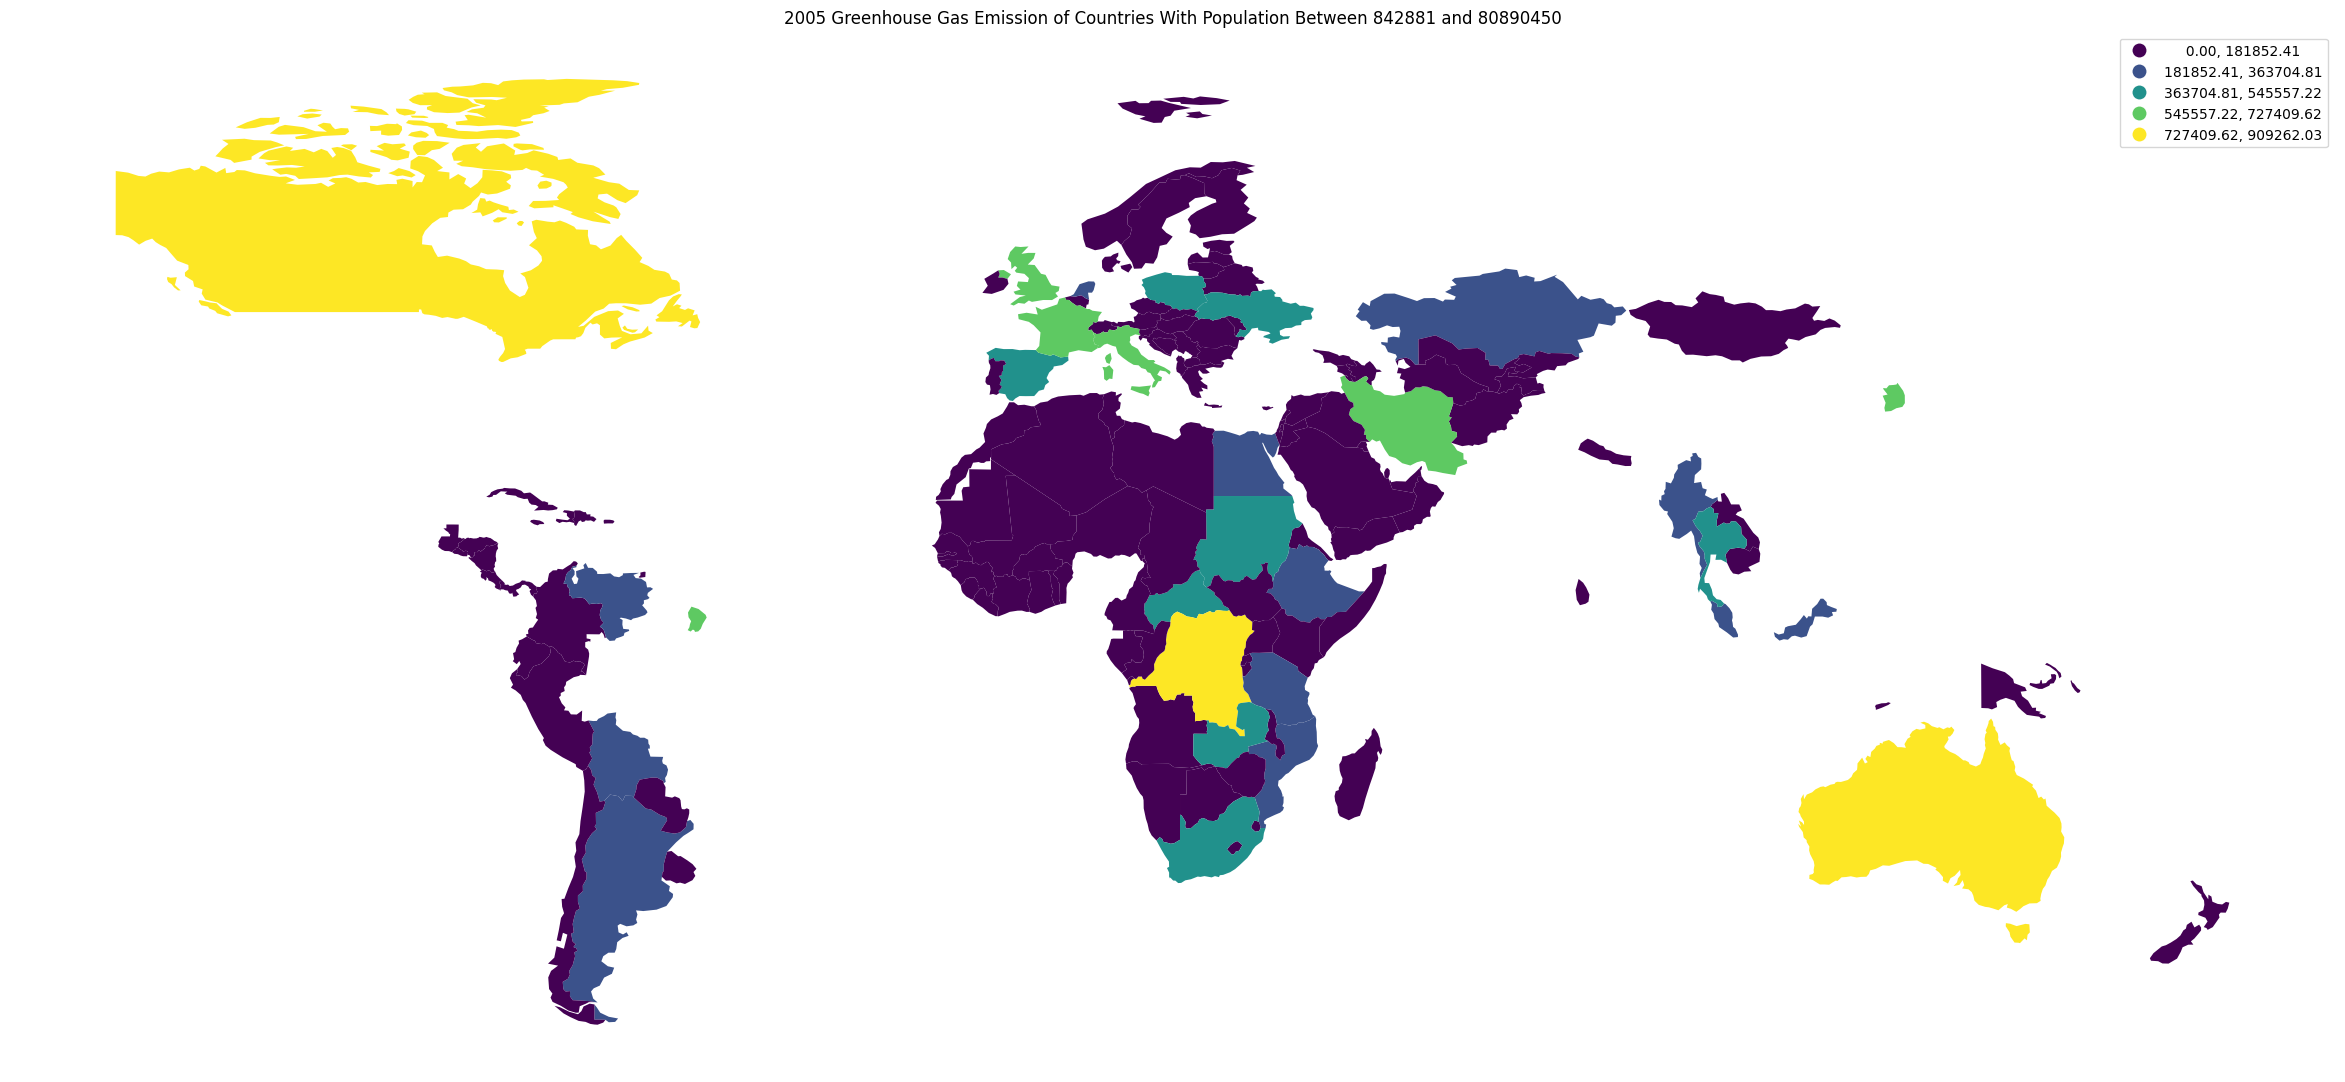

In [23]:
#Plot the greenhouse gas emission of countries with population between 842881 and 80890450

geo_pop_data_2005_subset = geo_pop_data_2005_subset.fillna(0)

print(f"{geo_pop_data_2005_subset.shape[0]} Countries of The World had a population between 842881 and 80890450 in 2005")



ax = geo_pop_data_2005_subset.plot(column='2005', figsize=(30,20), legend=True, scheme="equal_interval")
plt.title("2005 Greenhouse Gas Emission of Countries With Population Between 842881 and 80890450")
ax.set_axis_off()
plt.show()

In [24]:
# Print the list of countries with population between 842881 and 80890450 and with the lowest emission in 2005
countries = []

for i, row in geo_pop_data_2005_subset.iterrows():
  country = row['Country Name']
  year = row['2005']
  if year < 100:
    countries.append(country)


print(f"List of countries with the least emissions are: {countries}")

List of countries with the least emissions are: ['West Bank and Gaza', 'Saudi Arabia', 'Serbia', 'South Sudan']


#Question 5:
Plot (scatter or line plot) the percentage change in greenhouse gas emission from 2000 to 2010, for the country that has the highest population in 2010. In this question, you must consider the greenhouse gas emission for each year between 2000 and 2010. Very briefly interpret the generated plot.

In [25]:
# Merge geodata with population name

whole_data = geo_data.merge(pop_data, on="Country Name", how="inner")
whole_data.shape

(167, 139)

In [26]:
# Print country with highest population

max_pop_name = whole_data[whole_data['2010_y'] == whole_data['2010_y'].max()]['Country Name']
print(f"The country with the highest population in 2010 is {max_pop_name} and the population was {pop_data['2010'].max()}")

The country with the highest population in 2010 is 28    China
Name: Country Name, dtype: object and the population was 6921854591.0


From the above, we can see that China had the most population as of 2010.

In [27]:
chn_data = whole_data[whole_data['Country Name']== 'China']

In [28]:
# Create a dataframe using the greenshouse emissions of China and population from 2000 to 2010


data = pd.DataFrame({"emission": [x for x in chn_data.loc[28, ['2000_x', '2001_x', '2002_x', '2003_x', '2004_x', '2005_x', '2006_x', '2007_x', '2008_x', '2009_x', '2010_x']]],
                     "population" : [x for x in chn_data.loc[28, ['2000_y', '2001_y', '2002_y', '2003_y', '2004_y', '2005_y', '2006_y', '2007_y', '2008_y', '2009_y', '2010_y']]],
                    "Year"        : [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]})


data.head()

,emission,population,Year
0,5082325.60,1.262645e+09,2000
1,5145521.55,1.271850e+09,2001
2,5474914.90,1.280400e+09,2002
3,6226962.50,1.288400e+09,2003
4,7116642.40,1.296075e+09,2004


In [29]:
# Set column hyear as index

data.set_index("Year", inplace=True)

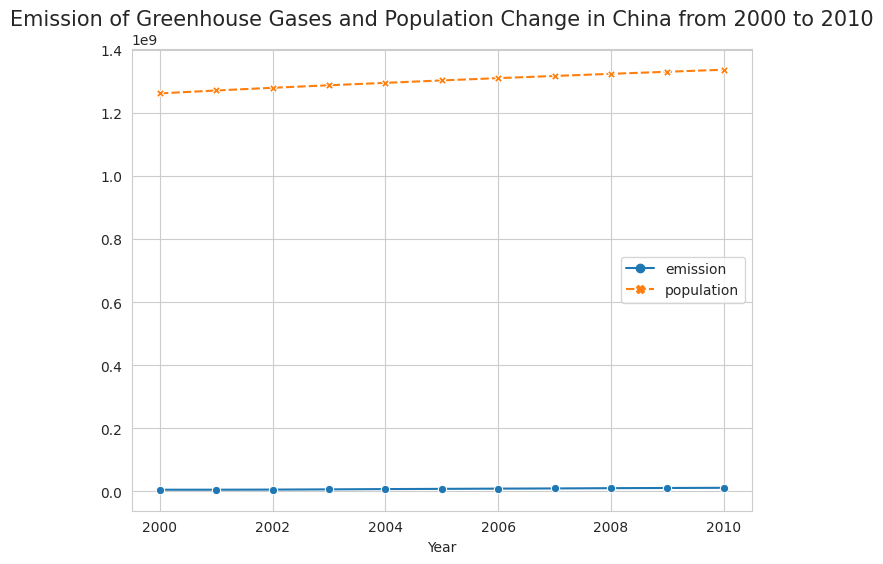

In [30]:
# plot a line graph of emission and population of China from 2000 to 2010

plt.figure(figsize=(8, 6))
sns.set_style(style='whitegrid')
sns.lineplot(data=data[["emission", "population"]], legend=True, markers=True)
#fig = plt.figure(figsize=(10, 10))
plt.title("Emission of Greenhouse Gases and Population Change in China from 2000 to 2010", size=15)
plt.show()


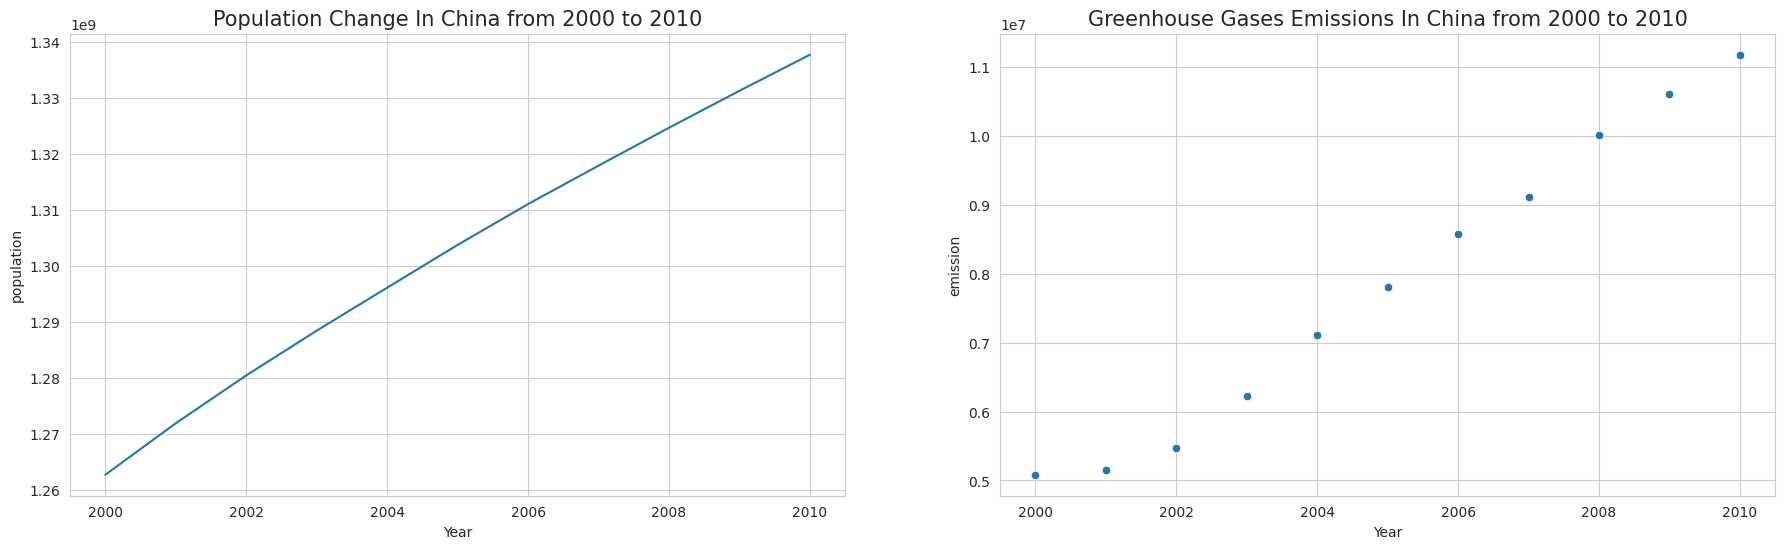

In [31]:
# Population and greenhouse emissions separate plots



fig, (ax1, ax2) = plt.subplots(1,2, figsize = (22, 6))
sns.set_style(style='whitegrid')
sns.lineplot(data=data["population"], legend=True, markers=True, ax=ax1)
sns.scatterplot(data=data["emission"], legend=True, markers=True, ax=ax2)
ax1.set_title("Population Change In China from 2000 to 2010", size=15)
ax2.set_title("Greenhouse Gases Emissions In China from 2000 to 2010", size=15)
plt.show()



Finally for the country with the highest population, let us find out of population is correlated with greenhouse emission.  

In [32]:
# Test correlation between China's population and green house emission

data['population'].corr(data['emission'], method='spearman')

1.0

# **Conclusion:**

The countries with the highest population also had the highest emission of green house gases over the years.
The analysis also shows a perfect correlation between China's population growth and it's green house emission as over the years. This means that as the population grew, the green house emissions increased as well.

For China, this could largely be linked to the industrial nature of China however further analysis would be required to acertain how the industrialization of China led to increase in green house emissions.